# Using CNN for MNIST Handwritten Digit Classification

*   An image classification problem
*   Develop a convolutional neural network (CNN) for handwritten digit classification.
*   CNN uses multilayer perceptrons to do computational works. 
*   The network learns through filters that in traditional algorithms were hand-engineered. So, for the image processing tasks CNNs are the best-suited option.




## The supervised machine learning (ML) process

![SML](https://static.javatpoint.com/tutorial/machine-learning/images/supervised-machine-learning.png)

### The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.
![DML](https://i.imgur.com/ITrm9x4.png)




** Import necessary Python libraries **

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

https://www.tensorflow.org/

In [1]:
import tensorflow as tf
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np 

print("Libraries are imported successfully")
print("Tensorflow version: ",tf.__version__)


Libraries are imported successfully
Tensorflow version:  2.12.0


## Labeled data and labels - the MNIST dataset
* The MNIST dataset stands for the Modified National Institute of Standards and Technology dataset.

* It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

* The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

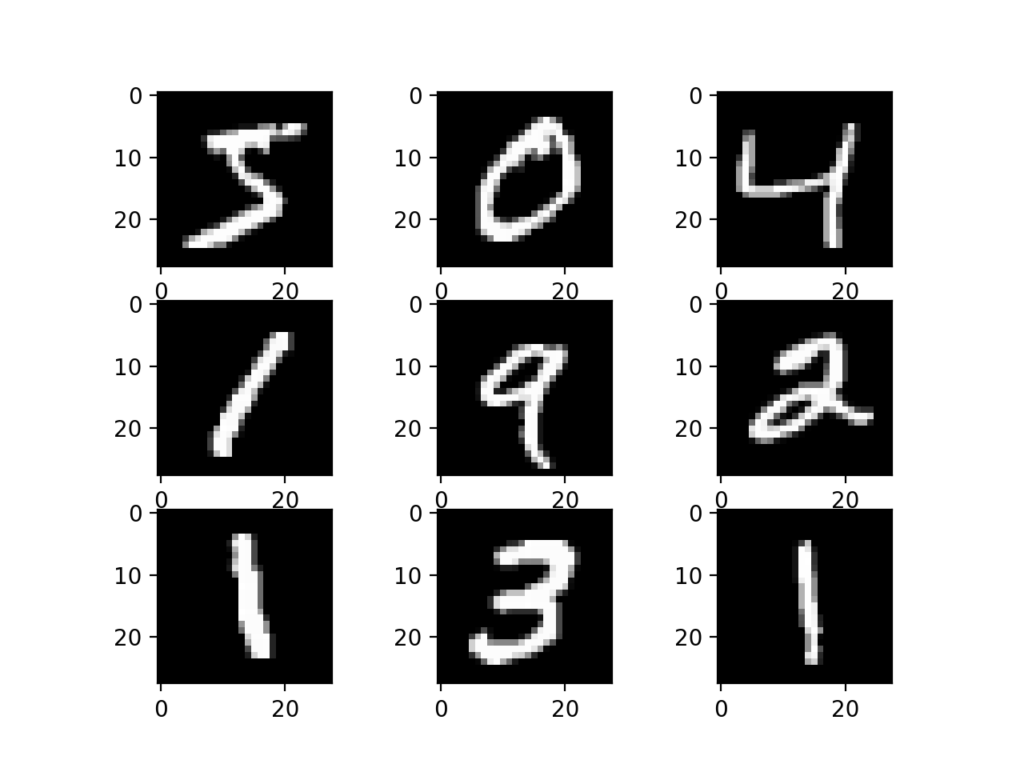

In [2]:
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data() 

  
# Translation of data  
# -------------Start editting -------------
# Reshape to 60000 x (28 x 28 x1)
X_Train_keras = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test_keras = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  
# -------------End editting ------------- 
 

11490434/11490434 [==============================] - 0s 0us/step


### Image representation
Image representation - B/W image
![](https://edtech.engineering.utoronto.ca/sites/default/files/M6_2DImageDigitalRepresentation.png)

**Image representation - Color image**
![](https://www.researchgate.net/profile/Bhupendra-Pratap-Singh/publication/282798184/figure/fig15/AS:283989639221249@1444719814399/Color-image-representation-and-RGB-matrix.png)

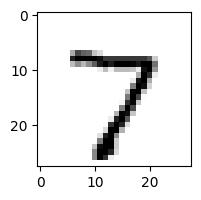

In [3]:
import matplotlib.pyplot as plt  
def plot_image(image): 
    #get current figure 
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

plot_image(X_Test[0])

### Labels - *One-hot encoding*

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

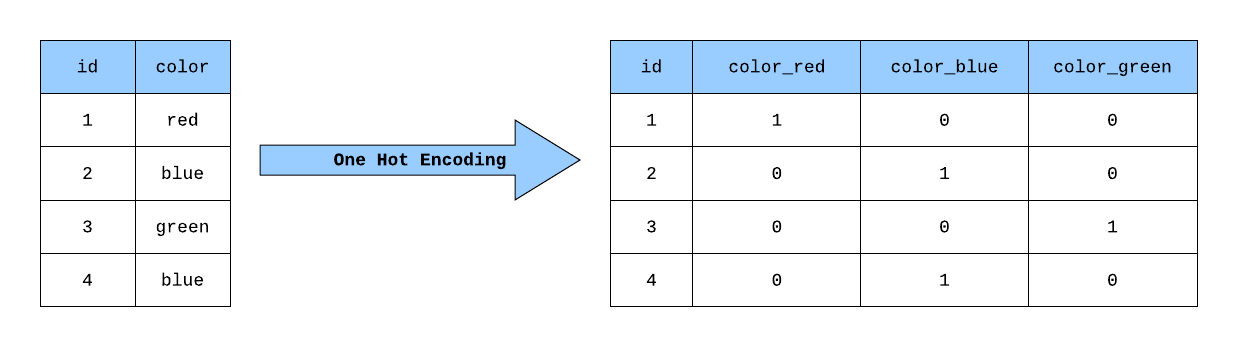




In [4]:
# Standardize feature data  
X_Train_keras_norm = X_Train_keras / 255  
X_Test_keras_norm = X_Test_keras /255  
      
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)



In [5]:
print("y_Train:",y_Train.shape)
print(type(y_Train))
print("y_TrainOneHot:",y_TrainOneHot.shape)
print(type(y_TrainOneHot))


y_Train: (60000,)
<class 'numpy.ndarray'>
y_TrainOneHot: (60000, 10)
<class 'numpy.ndarray'>


### Exercise 
Question:

1.   What is the labeled data for 89th data set in MINST?
2.   Show the image of 89th data set (Hinst: by using plot_image) 


In [9]:
# -------------Start editting -------------
# Read the labeled data for 89th data set in MINST
# -------------End editting -------------

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

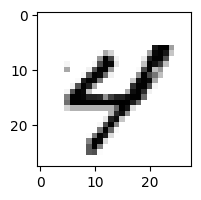

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [7]:
# -------------Start editting -------------
# Show the image of 89th data set (Hinst: by using plot_image)
# -------------End editting -------------

## Model Training - Create a convolutional neural network
![](https://editor.analyticsvidhya.com/uploads/29624cnn_banner.png)


In [ ]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
      
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                     kernel_size=(5,5),  
                     padding='same',  
                     input_shape=(28,28,1),  
                     activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
      
# Add Dropout layer  
model.add(Dropout(0.25))  


Create two fully connected layer


In [ ]:
model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
#Prevent overfitting
model.add(Dropout(0.5))  

#Ouput N-class probabilities
model.add(Dense(10, activation='softmax'))


model.summary()  
print("")  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               401536    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

* **layer1** is the Conv2d layer which convolves the image using 16 filters each of size (5*5). 
* **layer2** is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2). 
* **layer3** is showing Dropout at a rate of 0.25. 
* **layer4** is flattening the output obtained from layer5 and this flattens output is passed to layer7. 
* **layer5** is a hidden layer of a neural network containing 128 neurons. 
* **layer6** is showing Dropout at a rate of 0.5. 
* **layer7** is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

### Convolutional operation

![](https://raw.githubusercontent.com/yashk2810/yashk2810.github.io/master/images/convolution.gif)

In [ ]:
#kernel = np.array([
#    [1, 0, 1],
#    [0,  1, 0],
#    [1, 0, 1],
#])

kernel = np.array([
    [-1, 0, 1],
    [-2,  0, 2],
    [-1, 0, 1],
])

#kernel = np.array([np.array([2, -2]), np.array([2, -2])])

#plt.figure(figsize=(3, 3))
print(kernel)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


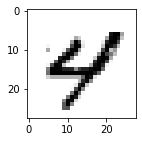

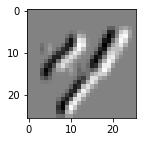

(28, 28)
(26, 26)


In [ ]:
idx=89 # 51 52 89 50
image = X_Train[idx].astype('float32')
image_filter=np.zeros((image.shape[0]-kernel.shape[0]+1,image.shape[0]-kernel.shape[0]+1))
for r  in range(image.shape[0]-kernel.shape[0]+1):
  for c in range(image.shape[1]-kernel.shape[0]+1):
#for r  in range(6,7):
#  for c in range(21,22):
    value=0.0
    for x in range(kernel.shape[0]):
      for y in range(kernel.shape[0]):
        value=image[r+y,c+x]*kernel[y,x]+value
#        print(r,c,image[r,c],value)
    image_filter[r,c]=value

plot_image(image)
plot_image(image_filter)
print(image.shape)
print(image_filter.shape)
#print(type(kernel[0,0]))
#print(image[6,:])

## Model Training - Start to train the CNN

**Batch size** is a term used in machine learning and refers to the number of training examples utilized in one iteration.

**Loss function** is a function that maps an event or values of one or more variables onto a real number intutively representing some "cost" assocaited with the event.

[Tutorial](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

train_history = model.fit(x=X_Train_keras_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)  

Epoch 1/10
160/160 - 2s - loss: 0.0619 - accuracy: 0.9809 - val_loss: 0.0442 - val_accuracy: 0.9871 - 2s/epoch - 14ms/step
Epoch 2/10
160/160 - 1s - loss: 0.0567 - accuracy: 0.9819 - val_loss: 0.0450 - val_accuracy: 0.9879 - 667ms/epoch - 4ms/step
Epoch 3/10
160/160 - 1s - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0406 - val_accuracy: 0.9887 - 709ms/epoch - 4ms/step
Epoch 4/10
160/160 - 1s - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0405 - val_accuracy: 0.9882 - 711ms/epoch - 4ms/step
Epoch 5/10
160/160 - 1s - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0405 - val_accuracy: 0.9886 - 703ms/epoch - 4ms/step
Epoch 6/10
160/160 - 1s - loss: 0.0417 - accuracy: 0.9873 - val_loss: 0.0408 - val_accuracy: 0.9889 - 701ms/epoch - 4ms/step
Epoch 7/10
160/160 - 1s - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0388 - val_accuracy: 0.9891 - 705ms/epoch - 4ms/step
Epoch 8/10
160/160 - 1s - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0385 - val_accuracy: 0.9897 - 884ms/epoch - 6ms/step
Ep

## Prediction - Evaulate trained network

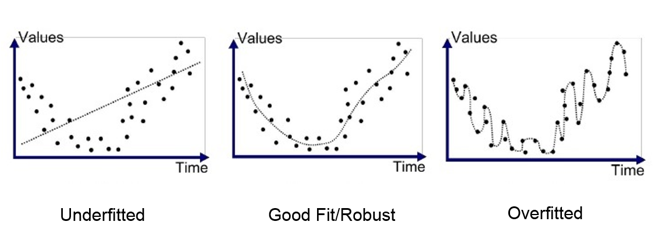

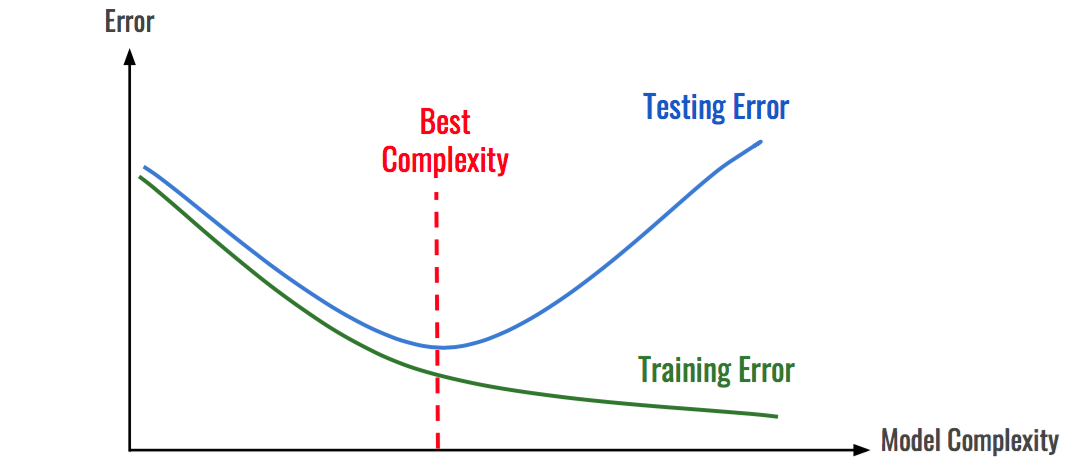

In [ ]:
import os  
      
      
import matplotlib.pyplot as plt  
 
      
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  


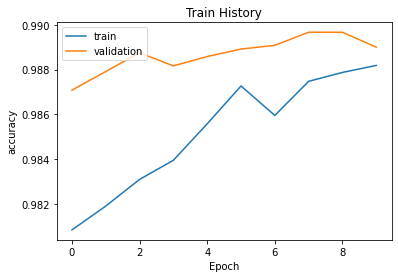

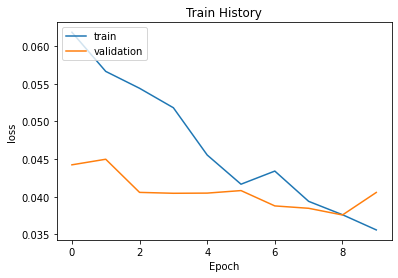

In [ ]:
#!pip3 install utils
#from utils import *  

show_train_history(train_history, 'accuracy', 'val_accuracy')  
show_train_history(train_history, 'loss', 'val_loss')  

In [ ]:
loss, accuracy = model.evaluate(X_Test_keras_norm, y_TestOneHot)  
print()  
print("[Info] Accuracy of testing data = {:2.1f}%".format(accuracy*100.0))  


313/313 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9906

[Info] Accuracy of testing data = 99.1%


### Confusion Matrix 
![Confusion Matrix](
https://www.researchgate.net/profile/Alejandro-Baldominos/publication/328816477/figure/fig3/AS:703352962809858@1544703822325/Confusion-matrix-for-the-MNIST-dataset-with-the-best-ensemble.png)


In [ ]:
test_predictions = np.argmax(model.predict(X_Test_keras_norm), axis=-1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_Test, y_pred = test_predictions)
print(cm)

In [ ]:
result = np.where(test_predictions != y_Test)
print(len(result[0]),",",result)

In [ ]:
print("[Info] Making prediction of X_Test_norm")  
#prediction = model.predict(X_Test_keras_norm)  # Making prediction and save result to prediction  
prediction = np.argmax(model.predict(X_Test_keras_norm), axis=-1)  # Making prediction and save result to prediction  
idx=18
print("[Info] Show 10 prediction result (From {}):".format(idx))  
plot_images_labels_predict(X_Test, y_Test, prediction, idx)  

### Exercise - modify the network to improve the accuracy 


In [ ]:
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                     kernel_size=(3,3),  
                     padding='same',  
                     input_shape=(28,28,1),  
                     activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Add Dropout layer  
model.add(Dropout(0.25))  
model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
#Prevent overfitting
model.add(Dropout(0.5))  

#Ouput N-class probabilities
model.add(Dense(10, activation='softmax'))


model.summary()  
print("")  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

train_history = model.fit(x=X_Train_keras_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)  

In [ ]:
loss, accuracy = model.evaluate(X_Test_keras_norm, y_TestOneHot)  
print()  
print("[Info] Accuracy of testing data = {:2.1f}%".format(accuracy*100.0))  


In [ ]:
result = np.where(test_predictions != y_Test)
print(len(result[0]),",",result)

## Prediction -  Test your own handwritten digit
1.  Create your handwritten digit via the [Online image Editor](https://www.pixilart.com/draw/28x28-517d2f9c7af2f70)
2.  Download the file to your local drive
3. Upload the file to an [online storage](https://imgbb.com/)
4. Get the URL of your stored image 

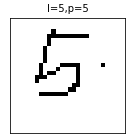


In [ ]:
from imageio import imread
import numpy as np
image = imread('https://i.ibb.co/Kshs4Yt/pixil-frame-0-2.png')
X_image=np.array([image[:,:,3]])
X_image_keras = X_image.reshape(X_image.shape[0], 28, 28, 1).astype('float32')  
Y_label=np.array([5])
prediction = np.argmax(model.predict(X_image_keras), axis=-1)  # Making prediction and save result to prediction  
plot_images_labels_predict(X_image, Y_label, prediction, 0,1) 